# BT3041 Assignment 1: Question 1
## UTKARSH KUMAR : ME17B123

In [9]:
import pickle
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [10]:
# Global variables for coordinates and labels
x_coords = []
y_coords = []

Loading data from pickle format

C:\Users\UTKARSH_KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

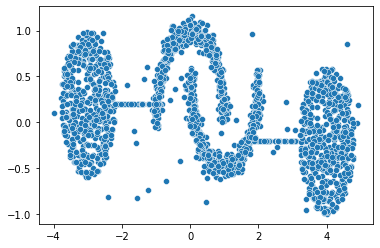

In [11]:
with open('dbscan2000.pkl', 'rb') as d:
    data = pickle.load(d)

    for i in range(len(data)):
        x_coords.append(float(data[i][0])) #storing data in column 1
        y_coords.append(float(data[i][1])) #storing data in column 2

import seaborn as sns
sns.scatterplot(x_coords, y_coords)


## CLUSTER ALGORITHM

In [12]:
# Function to cluster the points, searches for neighbors and adds them to the cluster
def dbscan(minpts, eps):

    labels = [0] * len(x_coords) # List for predicted cluster
    curr_clus_label = 0

    for point in range(len(x_coords)):
        if not labels[point] == 0:
            continue

        neighbors = findNeighbors(point, eps)

        if len(neighbors) < minpts:
            labels[point] = -1
        else:
            curr_clus_label += 1
            labels = create_cluster(point, neighbors, curr_clus_label, eps, minpts, labels)
    
    return labels

def create_cluster(point, neighbors, curr_clus_label, eps, minpts, labels):
# Function to find neighbors of the point being sent in, finds all the neighbors and adds them to the current
# ongoing cluster. Stops when no more unique neighbors exist

    labels[point] = curr_clus_label

    i = 0
    while i < len(neighbors):
        next_neighbor = neighbors[i]

        if labels[next_neighbor] == -1:
            labels[next_neighbor] = curr_clus_label
        
        elif labels[next_neighbor] == 0:
            labels[next_neighbor] = curr_clus_label
            next_neighbor_points = findNeighbors(next_neighbor, eps)

            if len(next_neighbor_points) >= minpts:
                for pts in next_neighbor_points:
                    if pts not in neighbors and pts != point:
                        neighbors.append(pts)
        i += 1
    return labels

def findNeighbors(point, eps):
# Function to calculate distance between the set of points provided as argument and classify whether they are neighbors
# or not under the current criteria
    neighbors = []

    for i in range(len(x_coords)):
      
        dist = sqrt(((x_coords[point] - x_coords[i]) ** 2) + ((y_coords[point] - y_coords[i]) ** 2))
        if dist < eps and dist > 0:
            neighbors.append(i)
    
    return neighbors

### PLOTTING ALGORITHM

In [15]:
# Scatter plot graph function uses various colors for different clusters
def plot_clustered_points(labels):
    cmap = plt.cm.jet
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = cmap.from_list('Custom', cmaplist, cmap.N)

    fig = plt.figure(figsize=(9,5))
    plt.scatter(x_coords, y_coords, c=labels, s=7, cmap=cmap)
    plt.savefig('clustered_points.png') # Save the plot
    print(fig)

### FINDING VALUE OF EPSILON

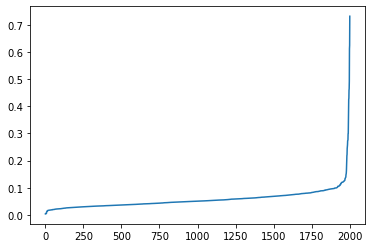

In [18]:
def dist_array(x, y, i):
    dist = [0 for i in range(len(x_coords))]
    for j in range(len(x_coords)):
        dist[j] = math.dist((x_coords[j],y_coords[j]),(x_coords[i],y_coords[i]))
    return dist


k = 4     # MinPts
k_dist = [0 for i in range(len(x_coords))]
for i in range(len(x_coords)):
    dist = dist_array(x_coords, y_coords, i)   
    dist.sort()
    k_dist[i] = dist[k-1]
k_dist.sort()
x_k_dist = [i for i in range(1, len(x_coords)+1)]
plt.plot(x_k_dist, k_dist)
plt.show()

In the above graph, there is a knee bend in between 0.1 and much less than 0.15, suggesting that the value of eps is between them. So we write an algorithm stating the same and find out the best possible graph.

min_points= 4.000000  eps= 0.020000 
Figure(648x360)
min_points= 4.000000  eps= 0.030000 
Figure(648x360)
min_points= 4.000000  eps= 0.040000 
Figure(648x360)
min_points= 4.000000  eps= 0.050000 
Figure(648x360)
min_points= 4.000000  eps= 0.060000 
Figure(648x360)
min_points= 4.000000  eps= 0.070000 
Figure(648x360)
min_points= 4.000000  eps= 0.080000 
Figure(648x360)
min_points= 4.000000  eps= 0.090000 
Figure(648x360)
min_points= 4.000000  eps= 0.100000 
Figure(648x360)
min_points= 4.000000  eps= 0.110000 
Figure(648x360)
min_points= 4.000000  eps= 0.120000 
Figure(648x360)
min_points= 4.000000  eps= 0.130000 
Figure(648x360)
min_points= 4.000000  eps= 0.140000 
Figure(648x360)
min_points= 4.000000  eps= 0.150000 
Figure(648x360)


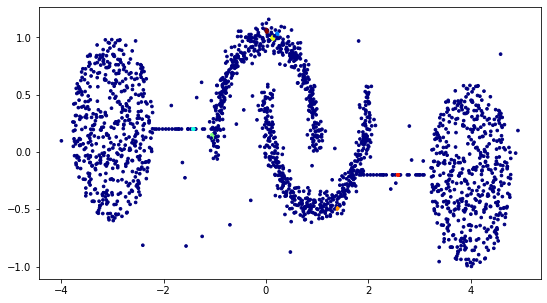

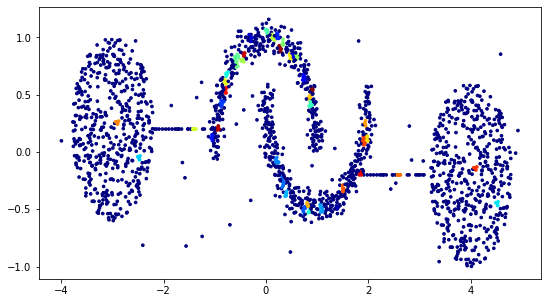

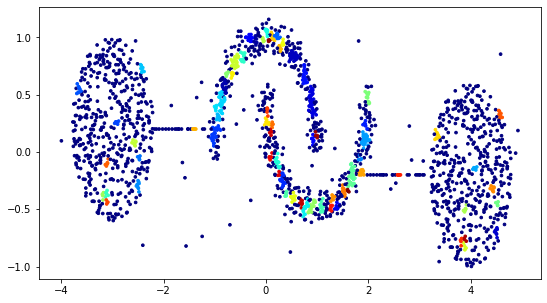

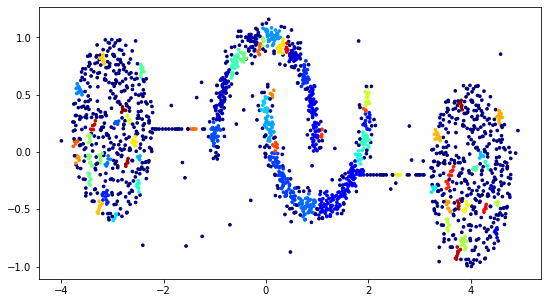

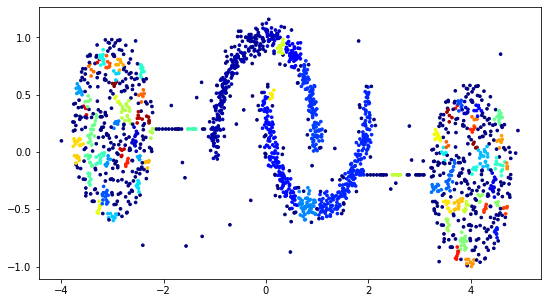

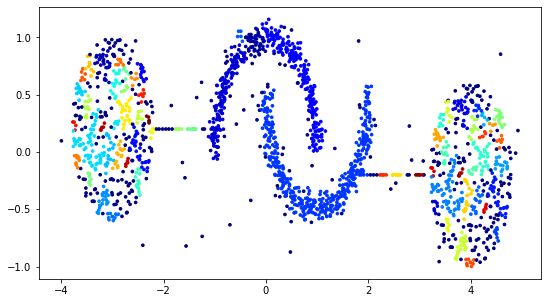

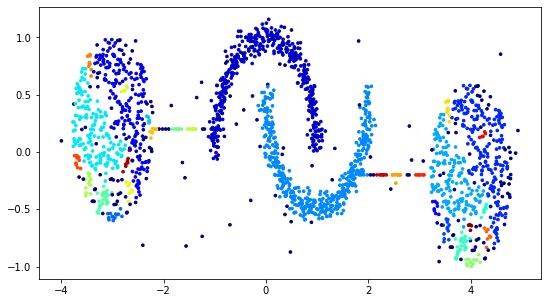

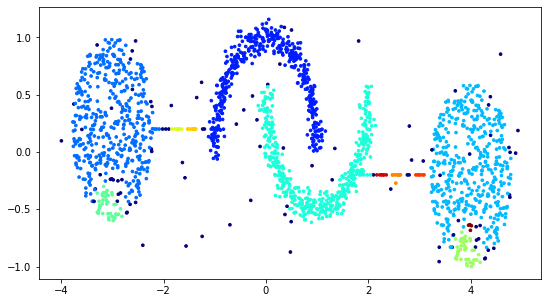

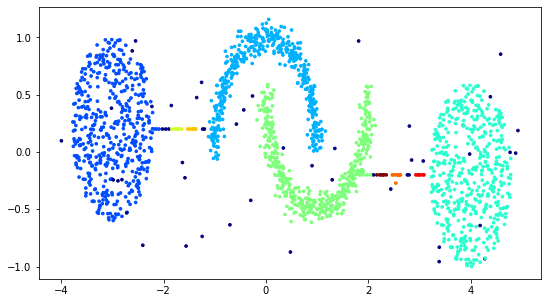

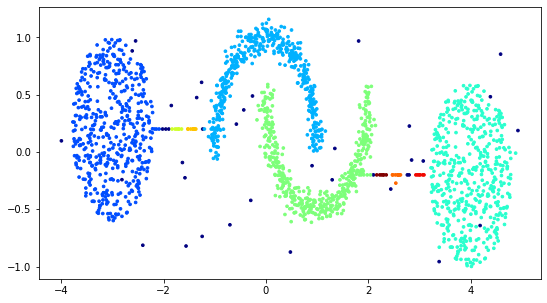

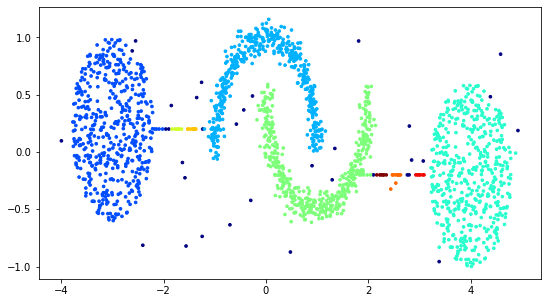

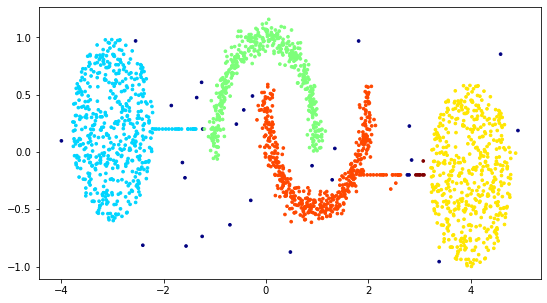

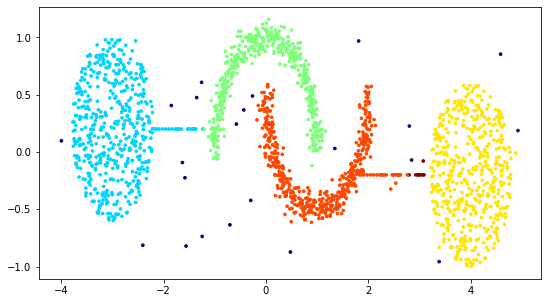

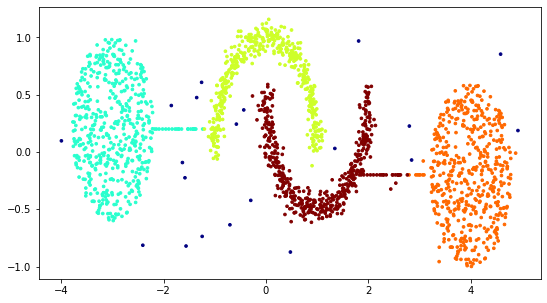

In [19]:
eps=0.01
min_points=4
eps=0.01
while eps< 0.15:
        eps=eps+float(0.01)
        print("min_points= %f  eps= %f "%(min_points, eps))
        labels = dbscan(min_points, eps)
        plot_clustered_points(labels)

In [20]:
eps=0.13   #from previous graph, we get eps=0.13
min_points=4
dataa=pd.read_csv('weird_pickle.csv')
dataa['x_c']=x_coords
#len(dataa)
dataa['y_c']=y_coords
x= x_coords 
y= y_coords 
point_dummy=np.zeros(shape=(2000,1))
for i in range (len(x)):
    c=0
    for j in range (len(x)):
        distance = math.dist((x[i],y[i]),(x[j],y[j]))
        if(distance<=eps):
            c+=1
    if(c>=(min_points+1)):
        point_dummy[i]=[1]  #core
       
    elif(c>1 and c<=min_points):
        point_dummy[i]=[2]  #boundary
        
    else:
        point_dummy[i]=[0]   #noise
dataa['type']=point_dummy
#dataa.head(200)

## PLOT OF CORE, NEIGHBOURHOOD AND NOISE POINTS

<AxesSubplot:xlabel='x_c', ylabel='y_c'>

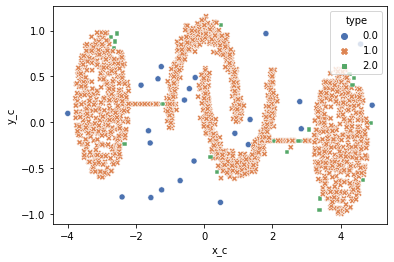

In [21]:
sns.scatterplot(data=dataa,x='x_c',y='y_c',hue="type", style="type",palette="deep")

The plot showing core, neighbourhood and noise points.

In [26]:
print("The number of core points are %d , boundary points are %d  and noise are %d" %(len(dataa[dataa['type']==1]),len(dataa[dataa['type']==2]),len(dataa[dataa['type']==0])))

The number of core points are 1953 , boundary points are 24  and noise are 23
